In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import warnings
warnings.filterwarnings("ignore")

d:\Aplikasi\Program\python\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import xgboost
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('laptop_clean.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            977 non-null    object 
 1   product            977 non-null    object 
 2   category           977 non-null    object 
 3   screen(inches)     977 non-null    float64
 4   ram(GB)            977 non-null    int64  
 5   gpu                977 non-null    object 
 6   os                 977 non-null    object 
 7   os_version         977 non-null    object 
 8   weight(kg)         977 non-null    float64
 9   price              977 non-null    float64
 10  resolution(pixel)  977 non-null    object 
 11  screentype         280 non-null    object 
 12  touchscreen        977 non-null    float64
 13  cpu_name           977 non-null    object 
 14  cpu_speed(GHz)     977 non-null    float64
 15  cpu_brand          977 non-null    object 
 16  storage_1(GB)      977 non

In [4]:
data.describe()

,screen(inches),ram(GB),weight(kg),price,touchscreen,cpu_speed(GHz),storage_1(GB),storage_2(GB)
count,977.00000,977.000000,977.000000,9.770000e+02,977.000000,977.000000,977.000000,977.000000
mean,15.05261,8.528147,2.039128,1.001899e+07,0.144319,2.284033,439.373593,173.776868
std,1.41895,4.997487,0.666009,6.306430e+06,0.351593,0.523576,364.729684,413.903988
min,10.10000,2.000000,0.690000,1.706375e+06,0.000000,0.900000,1.000000,0.000000
25%,14.00000,4.000000,1.500000,5.326308e+06,0.000000,1.800000,256.000000,0.000000
50%,15.60000,8.000000,2.020000,8.527428e+06,0.000000,2.500000,256.000000,0.000000
75%,15.60000,8.000000,2.300000,1.311570e+07,0.000000,2.700000,512.000000,0.000000
max,18.40000,32.000000,4.700000,5.423231e+07,1.000000,3.600000,2000.000000,2000.000000


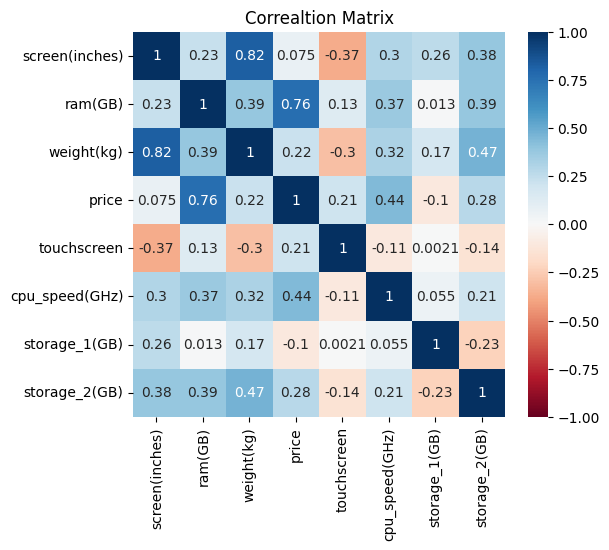

In [5]:
plt.figure(figsize=(6, 5))
sns.heatmap(data.corr(), cmap = 'RdBu', annot = True, vmin = -1, vmax = 1)
plt.title('Correaltion Matrix')
plt.show()

In [6]:
data.corr()

,screen(inches),ram(GB),weight(kg),price,touchscreen,cpu_speed(GHz),storage_1(GB),storage_2(GB)
screen(inches),1.000000,0.232315,0.822261,0.075152,-0.372378,0.299061,0.264011,0.384051
ram(GB),0.232315,1.000000,0.390161,0.764005,0.126847,0.374067,0.013461,0.387611
weight(kg),0.822261,0.390161,1.000000,0.224415,-0.300813,0.315575,0.173154,0.472422
price,0.075152,0.764005,0.224415,1.000000,0.206893,0.437639,-0.102464,0.279758
touchscreen,-0.372378,0.126847,-0.300813,0.206893,1.000000,-0.105242,0.002112,-0.140746
cpu_speed(GHz),0.299061,0.374067,0.315575,0.437639,-0.105242,1.000000,0.055488,0.207332
storage_1(GB),0.264011,0.013461,0.173154,-0.102464,0.002112,0.055488,1.000000,-0.231740
storage_2(GB),0.384051,0.387611,0.472422,0.279758,-0.140746,0.207332,-0.231740,1.000000


In [7]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

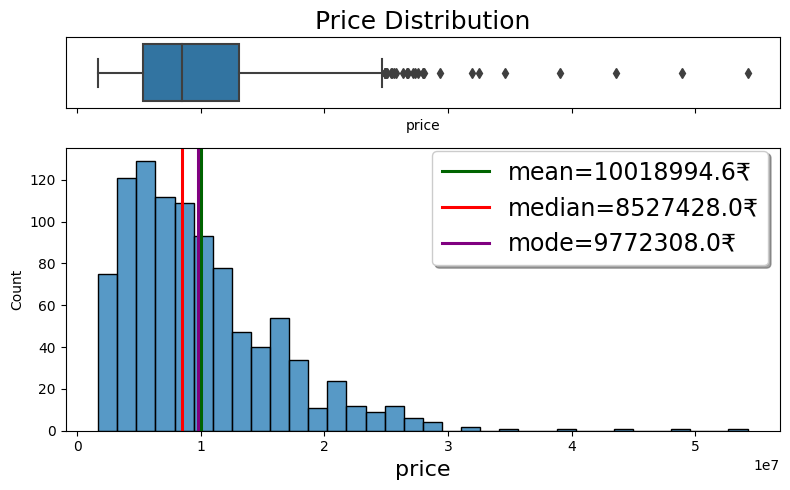

In [8]:
num_plot(data, 'price', 'Price Distribution', '₹')

In [9]:
data['price'] = np.log(data['price'])

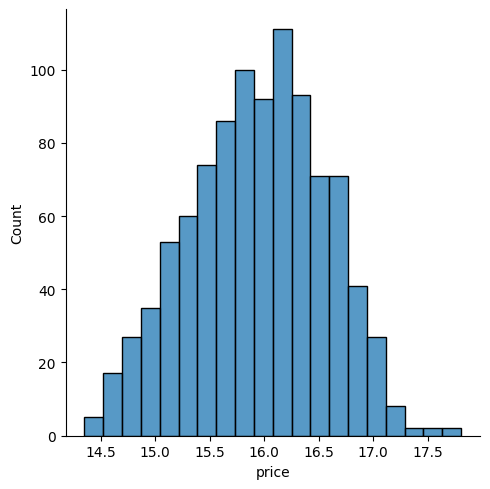

In [10]:
sns.displot(data['price'])

In [11]:
data['price'].describe()

count    977.000000
mean      15.935198
std        0.619325
min       14.349882
25%       15.488169
50%       15.958798
75%       16.389321
max       17.808787
Name: price, dtype: float64

In [12]:
data = data.fillna('NaN')

In [13]:
data.columns

Index(['company', 'product', 'category', 'screen(inches)', 'ram(GB)', 'gpu',
       'os', 'os_version', 'weight(kg)', 'price', 'resolution(pixel)',
       'screentype', 'touchscreen', 'cpu_name', 'cpu_speed(GHz)', 'cpu_brand',
       'storage_1(GB)', 'storage_2(GB)', 'storage_1_type', 'storage_2_type',
       'gpu_brand'],
      dtype='object')

In [14]:
print(len(data.columns))

21


In [15]:
catCols = ['company', 'product', 'category', 'gpu', 'os', 'os_version',  'resolution(pixel)', 'screentype', 'touchscreen', 'cpu_name', 'cpu_brand', 'storage_1_type', 'storage_2_type', 'gpu_brand']

In [16]:
#One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(data, columns=catCols, drop_first=True).shape)

Dataframe encoded by OHE dimension :  (977, 736)


In [17]:
#Label encoding
en = LabelEncoder()
for cols in catCols:
    data[cols] = en.fit_transform(data[cols])
print('Dataframe encoded by Label encoding dimension : ', data.shape)

Dataframe encoded by Label encoding dimension :  (977, 21)


In [18]:
data.head()

,company,product,category,screen(inches),ram(GB),gpu,os,os_version,weight(kg),price,...,screentype,touchscreen,cpu_name,cpu_speed(GHz),cpu_brand,storage_1(GB),storage_2(GB),storage_1_type,storage_2_type,gpu_brand
0,1,236,4,13.3,8,51,3,3,1.37,16.293101,...,1,0,46,2.3,1,128,0,3,1,1
1,1,237,4,13.3,8,45,3,3,1.34,15.894124,...,2,0,46,1.8,1,128,0,0,1,1
2,7,38,3,15.6,8,47,4,5,1.86,15.447277,...,2,0,52,2.5,1,256,0,3,1,1
3,1,236,4,15.4,16,7,3,3,1.83,16.931822,...,1,0,60,2.7,1,512,0,3,1,0
4,1,236,4,13.3,8,52,3,3,1.37,16.590447,...,1,0,46,3.1,1,256,0,3,1,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            977 non-null    int32  
 1   product            977 non-null    int32  
 2   category           977 non-null    int32  
 3   screen(inches)     977 non-null    float64
 4   ram(GB)            977 non-null    int64  
 5   gpu                977 non-null    int32  
 6   os                 977 non-null    int32  
 7   os_version         977 non-null    int32  
 8   weight(kg)         977 non-null    float64
 9   price              977 non-null    float64
 10  resolution(pixel)  977 non-null    int32  
 11  screentype         977 non-null    int32  
 12  touchscreen        977 non-null    int64  
 13  cpu_name           977 non-null    int32  
 14  cpu_speed(GHz)     977 non-null    float64
 15  cpu_brand          977 non-null    int32  
 16  storage_1(GB)      977 non

In [20]:
X = data.drop(['price'], axis=1).values

In [21]:
y = data['price'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [24]:
rf = RandomForestRegressor(n_estimators=100, max_depth=100, max_features=15)

In [25]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features=15)

In [26]:
y_pred_rf = rf.predict(X_test)

In [27]:
mse_rf = mean_squared_error(np.exp(y_test), np.exp(y_pred_rf))
print("RMSE using RF: {} $".format(np.round(np.sqrt(mse_rf)), 4))

RMSE using RF: 3109520.0 $


In [28]:
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_test, y_pred_rf), 4) * 100))

R2 using Random Forest: 88.36 %


In [29]:
feature_name_list = data.drop(['price'], axis=1).columns

In [30]:
rf.feature_names = feature_name_list

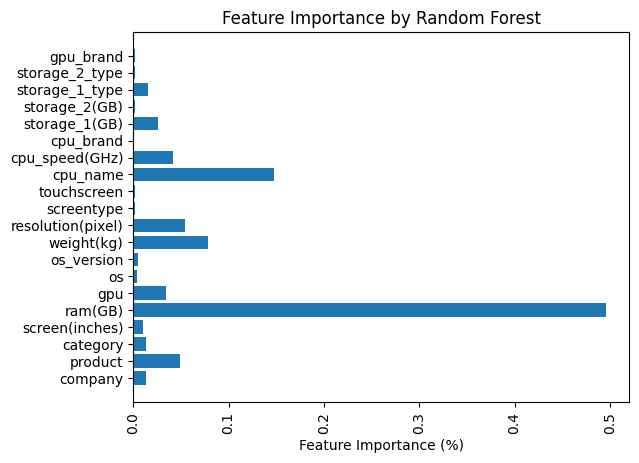

In [31]:
plt.barh(rf.feature_names, rf.feature_importances_)
plt.xticks(rotation = 90)
plt.title('Feature Importance by Random Forest')
plt.xlabel('Feature Importance (%)')
plt.show()

## XGBoost

In [32]:
def objective(trial, X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val):
    dtrain = xgboost.DMatrix(X_train, label=y_train)
    dvalid = xgboost.DMatrix(X_val, label=y_val)

    param = {
        'objective' : 'reg:squarederror',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 5.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 5.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.001,0.01,0.05,0.1,0.2,0.25,0.3]),
        'n_estimators': trial.suggest_categorical('n_estimators', [300,400,500,1000,1500,2000,2500,3000]),
        'max_depth': trial.suggest_categorical('max_depth', [3,4,5,6,7]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 100),
    }


    model = xgboost.XGBRegressor(**param)    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)   
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)

    return rmse

In [33]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

[I 2023-06-22 15:07:45,935] A new study created in memory with name: no-name-9116381b-6b22-4f45-b8ac-8ad62fb09876
[I 2023-06-22 15:07:46,670] Trial 0 finished with value: 0.42513176462165797 and parameters: {'lambda': 0.006243286577552665, 'alpha': 0.22947805410464434, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.05, 'n_estimators': 500, 'max_depth': 4, 'min_child_weight': 99}. Best is trial 0 with value: 0.42513176462165797.
[I 2023-06-22 15:07:47,235] Trial 1 finished with value: 0.20906858619293223 and parameters: {'lambda': 0.01515069664712779, 'alpha': 0.03653955602888755, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 4, 'min_child_weight': 49}. Best is trial 1 with value: 0.20906858619293223.
[I 2023-06-22 15:07:47,631] Trial 2 finished with value: 0.1881973897770137 and parameters: {'lambda': 0.0017661168887194718, 'alpha': 0.09365924226324392, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.25, 

Number of finished trials:  100
Best trial:
  Value: 0.16116270368932137
  Params: 
    lambda: 0.0014218554473478312
    alpha: 0.07173598073396718
    colsample_bytree: 0.4
    subsample: 0.6
    learning_rate: 0.01
    n_estimators: 1500
    max_depth: 7
    min_child_weight: 4


In [34]:
params

[0.0014218554473478312, 0.07173598073396718, 0.4, 0.6, 0.01, 1500, 7, 4]

In [35]:
lambda_opt = params[0]
alpha_opt = params[1]
colsample_bytree_opt = params[2]
subsample_opt = params[3]
learning_rate_opt = params[4]
n_estimators_opt = params[5]
max_depth_opt = params[6]
min_child_weight_opt = params[7]

In [36]:
xgb = XGBRegressor(reg_lambda = lambda_opt,
                   alpha = alpha_opt,
                   colsample_bytree = colsample_bytree_opt,
                   subsample_opt = subsample_opt,
                   learning_rate = learning_rate_opt,
                   n_estimators = n_estimators_opt,
                   max_depth = max_depth_opt,
                   min_child_weight = min_child_weight_opt)

In [37]:
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=0)

[15:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "subsample_opt" } are not used.



XGBRegressor(alpha=0.07173598073396718, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [38]:
y_pred_xgb = xgb.predict(X_test) 

In [39]:
mse_xgb = mean_squared_error(np.exp(y_test), np.exp(y_pred_xgb))

In [40]:
print("RMSE with XGBoost : {:.2f} $".format(np.round(np.sqrt(mse_xgb),2)))

RMSE with XGBoost : 2442084.76 $


In [41]:
print("R2 with XGBoost: {:.2f} % ".format(np.round(r2_score(y_test, y_pred_xgb),4)*100))

R2 with XGBoost: 92.45 % 


In [42]:
xgb.feature_names = feature_name_list

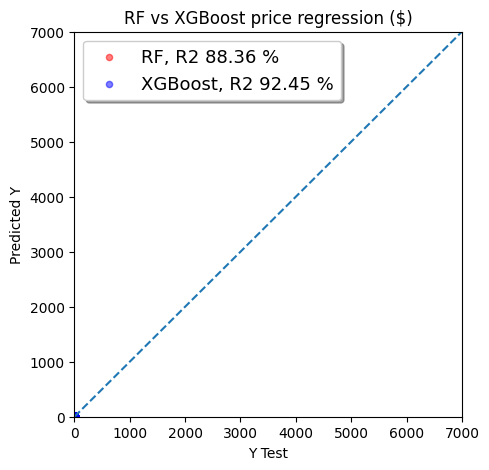

In [43]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='red', label='RF, R2 {:.2f} %'.format(r2_score(y_test, y_pred_rf)*100), s=20)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='blue', label='XGBoost, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb)*100), s=20)
plt.plot([0, 7000], [0, 7000], linestyle='--')
plt.axis([0, 7000, 0, 7000])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('RF vs XGBoost price regression ($)')
plt.legend(loc='upper left', ncol=1, fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.show()

In [44]:
print("RMSE using RF: {:.2f} $ ".format(np.sqrt(mse_rf)))
print("RMSE with XGBoost : {:.2f} $".format(np.sqrt(mse_xgb)))

RMSE using RF: 3109520.39 $ 
RMSE with XGBoost : 2442084.76 $


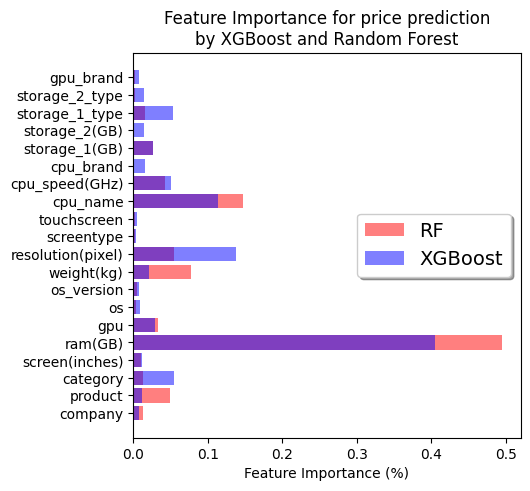

In [45]:
plt.figure(figsize=(5,5))
plt.barh(rf.feature_names,rf.feature_importances_, alpha=0.5, label='RF', color='red')
plt.barh(xgb.feature_names,xgb.feature_importances_, alpha=0.5, label='XGBoost', color='blue')
plt.legend(loc='center right',ncol=1, fontsize=14, fancybox=True, shadow=True, frameon=True)
plt.title('Feature Importance for price prediction\nby XGBoost and Random Forest')
plt.xlabel('Feature Importance (%)')
plt.show()

In [46]:
xgb.feature_names = data.drop(['price'], axis = 1).columns

In [47]:
feat_df= pd.DataFrame({'feature': xgb.feature_names,'importance':xgb.feature_importances_})

In [48]:
sorted_df=feat_df.sort_values('importance', ascending=False)

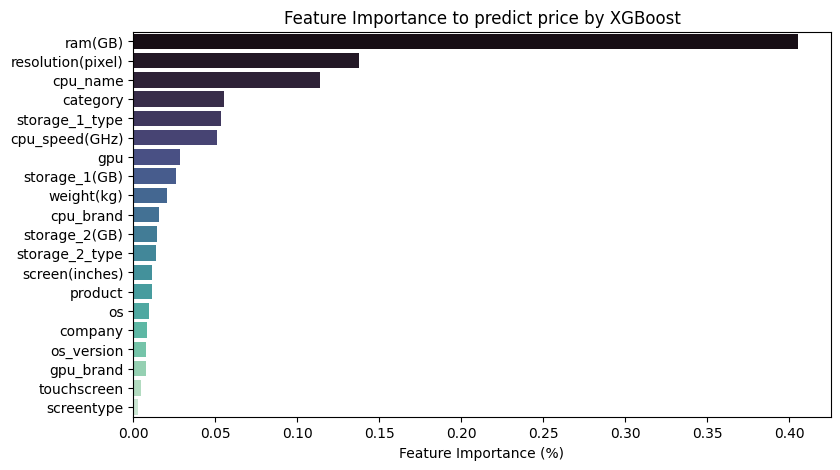

In [49]:
plt.figure(figsize=(9,5))
sns.barplot(x='importance', y='feature', data=sorted_df, palette='mako')
plt.title('Feature Importance to predict price by XGBoost')
plt.xlabel('Feature Importance (%)')
plt.ylabel('')
plt.show()

In [50]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)
lgbm = LGBMRegressor(max_depth = 3,n_estimators = 1000,learning_rate= 0.01)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb), ('LightGMB', lgbm)]

Linear Regression : 79.70 %
K Nearest Neighbours : 61.20 %
Decision Tree : 77.40 %
Random Forest : 89.90 %
AdaBoost : 82.30 %
Gradient Boosting Regressor : 87.70 %
XGBRegressor : 90.80 %
LightGMB : 90.40 %


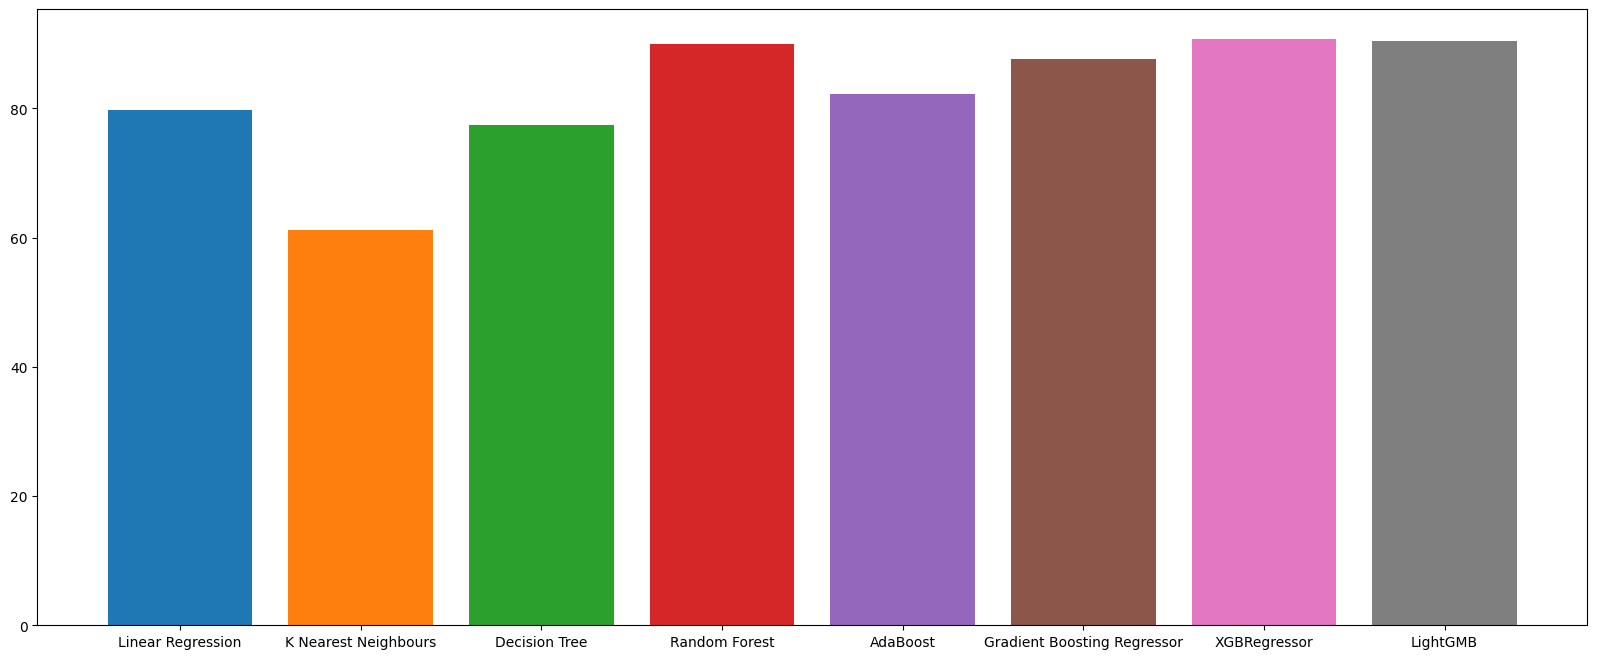

In [51]:
for regressor_name, regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test, y_pred), 3) * 100
    print('{:s} : {:.2f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20, 8)
    plt.bar(regressor_name, accuracy)

In [52]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.fit_transform(X_test)

Linear Regression : 79.70 %
K Nearest Neighbours : 61.20 %
Decision Tree : 77.00 %
Random Forest : 90.00 %
AdaBoost : 82.40 %
Gradient Boosting Regressor : 87.70 %
XGBRegressor : 90.80 %
LightGMB : 90.40 %


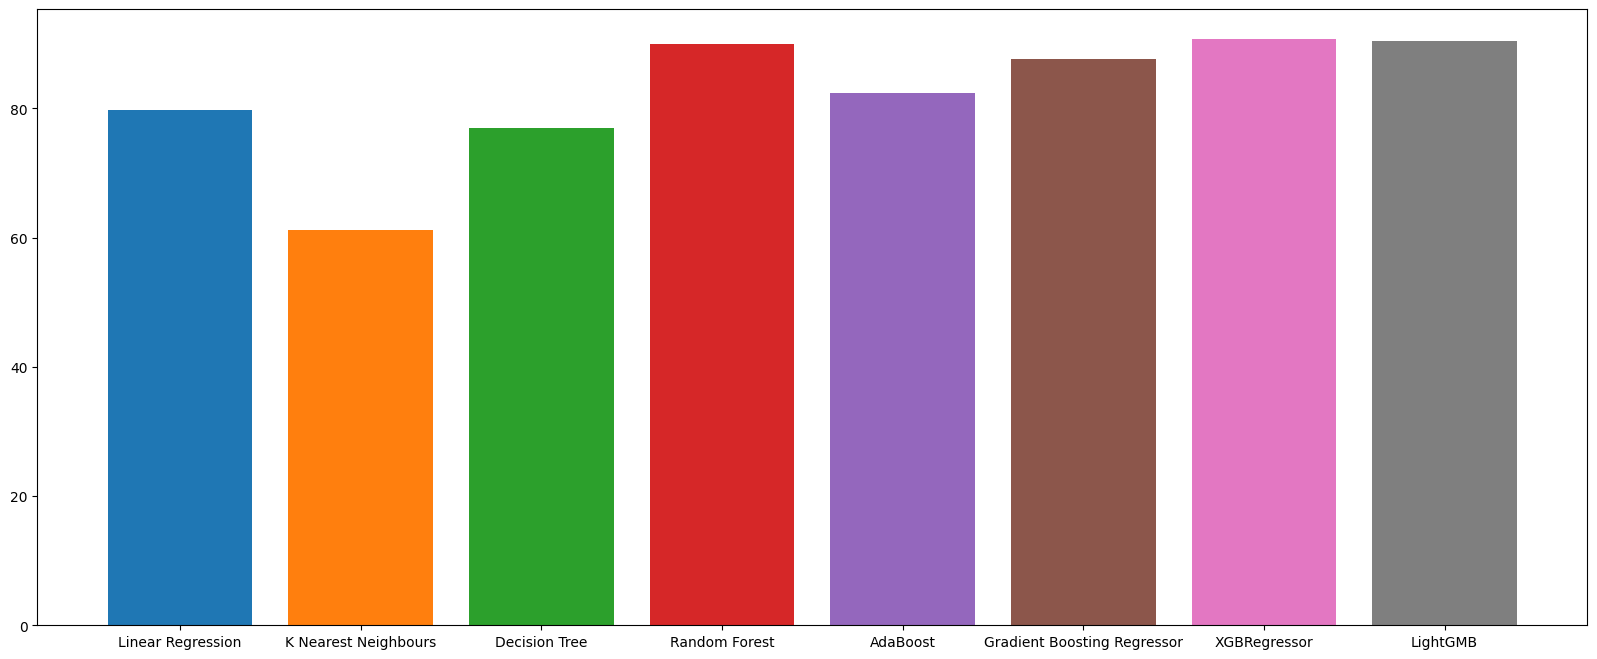

In [53]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.2f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

In [54]:
import plotly.graph_objects as go

accuracies = []
regressor_names = []
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'gray', 'black']

fig = go.Figure()

for i, (regressor_name, regressor) in enumerate(regressors):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test, y_pred), 3) * 100
    
    print('{:s} : {:.2f} %'.format(regressor_name, accuracy))
    
    accuracies.append(accuracy)
    regressor_names.append(regressor_name)

sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
accuracies = [accuracies[i] for i in sorted_indices]
regressor_names = [regressor_names[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]

fig.add_trace(go.Bar(x=regressor_names, y=accuracies, marker_color=colors))

fig.update_layout(title="Accuracy of Regression Models",
                  xaxis_title="Regressor",
                  yaxis_title="Accuracy (%)")
fig.show()

Linear Regression : 79.70 %
K Nearest Neighbours : 61.20 %
Decision Tree : 77.40 %
Random Forest : 90.00 %
AdaBoost : 82.00 %
Gradient Boosting Regressor : 87.60 %
XGBRegressor : 90.80 %
LightGMB : 90.40 %
